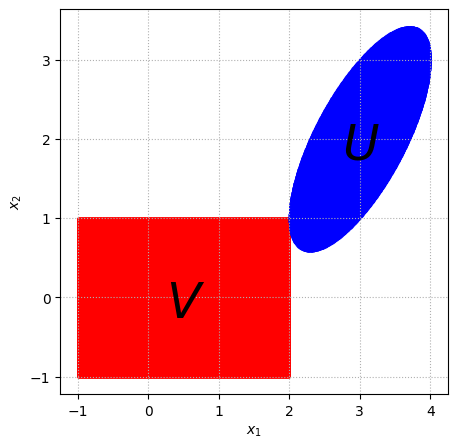

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
n = 2
y = np.array([3, 2])
sigma = np.array([0.5, 1])
A = np.array([[1, 0], [-1, 1]])

# Compute A^(1/2). Given A's structure, we'll use a direct approach for this specific case.
# For a general case, we would use a method like spectral decomposition.
# A_half = np.linalg.cholesky(A)

# Define Sigma matrix
Sigma = np.diag(sigma)

# Generate a grid of points for plotting
x_range = np.linspace(-1, 5, 2000)
y_range = np.linspace(-1, 5, 2000)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([X.flatten(), Y.flatten()]).T

# Function to check condition for set U using A directly
def in_set_U(z, A, y):
    return np.linalg.norm(np.dot(A, z - y)) <= 1

# Adjusting conditions based on the direct use of A and Sigma
U_condition = np.array([in_set_U(z, A, y) for z in Z])
V_condition = np.array([np.max(np.abs(Sigma.dot(z))) <= 1 for z in Z])

# Plotting the adjusted sets
plt.figure(figsize=(5, 5))
plt.grid(linestyle=":")

# Plot points in V
plt.scatter(Z[V_condition, 0], Z[V_condition, 1], color='red', alpha=0.5, label='Set V', s=1e-1)

# Plot points in U
plt.scatter(Z[U_condition, 0], Z[U_condition, 1], color='blue', alpha=0.5, label='Set U', s=1e-1)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.text(2.75, 1.75, s=r"$U$", fontsize=36)
plt.text(0.25, -0.25, s=r"$V$", fontsize=36)
# plt.title('Sets U and V')
plt.savefig("convex_intersection.png", dpi=1000)
plt.show()


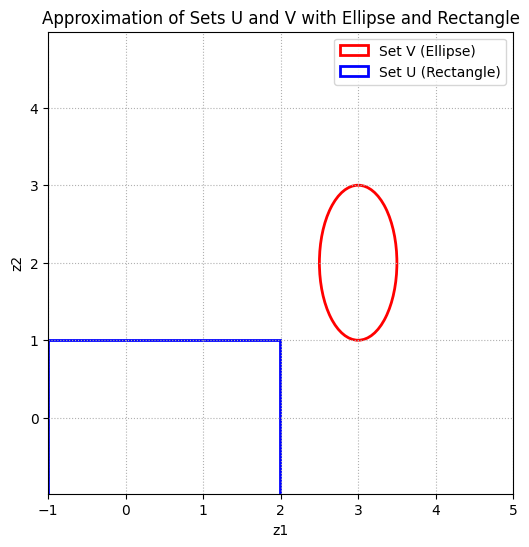

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

# Given data
y = np.array([3, 2])
sigma = np.array([0.5, 1])
A = np.array([[1, 0], [-1, 1]])
Sigma = np.diag(sigma)

# Generate the grid of points again
x_range = np.linspace(-1, 5, 400)
y_range = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([X.flatten(), Y.flatten()]).T

# Recheck conditions for U and V sets
U_condition = np.array([np.linalg.norm(np.dot(A, z - y)) <= 1 for z in Z])
V_condition = np.array([np.max(np.abs(Sigma.dot(z))) <= 1 for z in Z])

# Start the plot
plt.figure(figsize=(6, 6))
ax = plt.gca()
plt.grid(linestyle=":")

# Add an ellipse for set V, centered at y with width and height determined by 2*sigma values
ellipse = Ellipse(xy=y, width=2*sigma[0], height=2*sigma[1], edgecolor='red', fc='None', lw=2)
ax.add_patch(ellipse)

# Calculate the bounds for the rectangle representing set U
V_points = Z[V_condition]
lower_left = np.min(V_points, axis=0)
upper_right = np.max(V_points, axis=0)
rectangle = Rectangle(lower_left, upper_right[0] - lower_left[0], upper_right[1] - lower_left[1], edgecolor='blue', fc='None', lw=2)
ax.add_patch(rectangle)

plt.xlabel('z1')
plt.ylabel('z2')
plt.legend(['Set V (Ellipse)', 'Set U (Rectangle)'])
plt.title('Approximation of Sets U and V with Ellipse and Rectangle')

plt.axis('equal')  # Ensuring equal scaling for both axes
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()
